# Download Dataset

In [1]:
%matplotlib inline
import wget
import pandas as pd
from tqdm import tqdm
from collections import defaultdict, deque
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Main Dataset
# for year in range(1985, 2025):
#     url = "https://raw.githubusercontent.com/JeffSackmann/tennis_atp/refs/heads/master/atp_matches_"+str(year)+".csv"
#     filename = wget.download(url, out="./data/all/")


In [3]:
# Download ATP players info
# filename = wget.download("https://raw.githubusercontent.com/JeffSackmann/tennis_atp/refs/heads/master/atp_players.csv", out="./data/")

# Download ATP players rankings
# filename = wget.download("https://raw.githubusercontent.com/JeffSackmann/tennis_atp/refs/heads/master/atp_rankings_80s.csv", out="./data/rankings/")
# filename = wget.download("https://raw.githubusercontent.com/JeffSackmann/tennis_atp/refs/heads/master/atp_rankings_90s.csv", out="./data/rankings/")
# filename = wget.download("https://raw.githubusercontent.com/JeffSackmann/tennis_atp/refs/heads/master/atp_rankings_00s.csv", out="./data/rankings/")
# filename = wget.download("https://raw.githubusercontent.com/JeffSackmann/tennis_atp/refs/heads/master/atp_rankings_10s.csv", out="./data/rankings/")
# filename = wget.download("https://raw.githubusercontent.com/JeffSackmann/tennis_atp/refs/heads/master/atp_rankings_20s.csv", out="./data/rankings/")

## Look through data a bit

In [4]:
df = pd.read_csv("./data/all/atp_matches_2022.csv")
df.head(100)

,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_seed,winner_entry,...,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,winner_rank,winner_rank_points,loser_rank,loser_rank_points
0,2022-8888,Atp Cup,Hard,16,A,20220103,300,200000,NaN,NaN,...,50.0,32.0,7.0,10.0,3.0,5.0,11.0,3308.0,19.0,2260.0
1,2022-8888,Atp Cup,Hard,16,A,20220103,299,133430,NaN,NaN,...,33.0,21.0,8.0,9.0,3.0,6.0,14.0,2475.0,20.0,2230.0
2,2022-8888,Atp Cup,Hard,16,A,20220103,298,105138,NaN,NaN,...,80.0,62.0,20.0,16.0,6.0,7.0,19.0,2260.0,9.0,3706.0
3,2022-8888,Atp Cup,Hard,16,A,20220103,297,105807,NaN,NaN,...,27.0,17.0,1.0,7.0,4.0,8.0,20.0,2230.0,860.0,18.0
4,2022-8888,Atp Cup,Hard,16,A,20220103,296,106421,NaN,NaN,...,35.0,22.0,4.0,8.0,3.0,7.0,2.0,8640.0,11.0,3308.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,2022-9665,Melbourne,Hard,32,A,20220103,286,202195,NaN,Q,...,69.0,59.0,24.0,17.0,2.0,2.0,112.0,683.0,26.0,1936.0
96,2022-9665,Melbourne,Hard,32,A,20220103,284,105575,NaN,Q,...,29.0,24.0,10.0,11.0,0.0,4.0,104.0,739.0,66.0,929.0
97,2022-9665,Melbourne,Hard,32,A,20220103,283,200615,NaN,NaN,...,42.0,28.0,18.0,11.0,4.0,7.0,61.0,1000.0,78.0,846.0
98,2022-9665,Melbourne,Hard,32,A,20220103,282,134868,NaN,NaN,...,36.0,25.0,8.0,9.0,3.0,6.0,65.0,966.0,54.0,1101.0


## Concat All Data

In [5]:
all_data = pd.read_csv("./data/all/atp_matches_1991.csv")

In [6]:
all_data

,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_seed,winner_entry,...,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,winner_rank,winner_rank_points,loser_rank,loser_rank_points
0,1991-339,Adelaide,Hard,32,A,19901231,1,101723,NaN,NaN,...,62.0,44.0,23.0,16.0,6.0,8.0,56.0,NaN,2.0,NaN
1,1991-339,Adelaide,Hard,32,A,19901231,2,100946,NaN,Q,...,41.0,35.0,27.0,15.0,1.0,2.0,304.0,NaN,75.0,NaN
2,1991-339,Adelaide,Hard,32,A,19901231,3,101234,NaN,NaN,...,37.0,22.0,6.0,8.0,4.0,8.0,82.0,NaN,69.0,NaN
3,1991-339,Adelaide,Hard,32,A,19901231,4,101889,8.0,NaN,...,45.0,30.0,11.0,10.0,5.0,8.0,50.0,NaN,84.0,NaN
4,1991-339,Adelaide,Hard,32,A,19901231,5,101274,NaN,NaN,...,41.0,28.0,15.0,11.0,4.0,8.0,88.0,NaN,28.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3722,1991-604,Grand Slam Cup,Carpet,16,A,19911210,11,100656,4.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,20.0,NaN
3723,1991-604,Grand Slam Cup,Carpet,16,A,19911210,12,102021,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,15.0,NaN,36.0,NaN
3724,1991-604,Grand Slam Cup,Carpet,16,A,19911210,13,101609,7.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,17.0,NaN,4.0,NaN
3725,1991-604,Grand Slam Cup,Carpet,16,A,19911210,14,102021,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,15.0,NaN,5.0,NaN


In [7]:
for year in range(1992, 2025):
    file = "./data/all/atp_matches_"+str(year)+".csv"
    
    year_data = pd.read_csv(file)

    all_data = pd.concat([all_data, year_data], axis=0)
all_data

,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_seed,winner_entry,...,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,winner_rank,winner_rank_points,loser_rank,loser_rank_points
0,1991-339,Adelaide,Hard,32,A,19901231,1,101723,NaN,NaN,...,62.0,44.0,23.0,16.0,6.0,8.0,56.0,NaN,2.0,NaN
1,1991-339,Adelaide,Hard,32,A,19901231,2,100946,NaN,Q,...,41.0,35.0,27.0,15.0,1.0,2.0,304.0,NaN,75.0,NaN
2,1991-339,Adelaide,Hard,32,A,19901231,3,101234,NaN,NaN,...,37.0,22.0,6.0,8.0,4.0,8.0,82.0,NaN,69.0,NaN
3,1991-339,Adelaide,Hard,32,A,19901231,4,101889,8.0,NaN,...,45.0,30.0,11.0,10.0,5.0,8.0,50.0,NaN,84.0,NaN
4,1991-339,Adelaide,Hard,32,A,19901231,5,101274,NaN,NaN,...,41.0,28.0,15.0,11.0,4.0,8.0,88.0,NaN,28.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3071,2024-M-DC-2024-WG2-PO-URU-MDA-01,Davis Cup WG2 PO: URU vs MDA,Clay,4,D,20240203,5,212051,NaN,NaN,...,30.0,17.0,7.0,6.0,8.0,14.0,1109.0,8.0,740.0,34.0
3072,2024-M-DC-2024-WG2-PO-VIE-RSA-01,Davis Cup WG2 PO: VIE vs RSA,Hard,4,D,20240202,1,122533,NaN,NaN,...,41.0,25.0,6.0,9.0,1.0,4.0,554.0,67.0,748.0,32.0
3073,2024-M-DC-2024-WG2-PO-VIE-RSA-01,Davis Cup WG2 PO: VIE vs RSA,Hard,4,D,20240202,2,144748,NaN,NaN,...,51.0,25.0,7.0,11.0,5.0,12.0,416.0,109.0,NaN,NaN
3074,2024-M-DC-2024-WG2-PO-VIE-RSA-01,Davis Cup WG2 PO: VIE vs RSA,Hard,4,D,20240202,4,122533,NaN,NaN,...,51.0,32.0,17.0,14.0,5.0,9.0,554.0,67.0,416.0,109.0


#### Calculate ATP Point Diff and ATP Rank Diff

In [8]:
all_data_filtered = all_data.dropna(subset=[
    'winner_id', 'loser_id', 'winner_ht', 'loser_ht', 'winner_age', 'loser_age',
    "w_ace", "w_df", "w_svpt", "w_1stIn", "w_1stWon", "w_2ndWon", "w_SvGms", "w_bpSaved", "w_bpFaced",
    "l_ace", "l_df", "l_svpt", "l_1stIn", "l_1stWon", "l_2ndWon", "l_SvGms", "l_bpSaved", "l_bpFaced",
    'winner_rank_points', 'loser_rank_points', 'winner_rank', 'loser_rank', "surface"
    ]
)
all_data_filtered = all_data_filtered.reset_index(drop=True)
all_data_filtered

,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_seed,winner_entry,...,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,winner_rank,winner_rank_points,loser_rank,loser_rank_points
0,1991-301,Auckland,Hard,32,A,19910107,1,101142,1.0,NaN,...,30.0,17.0,7.0,8.0,2.0,6.0,9.0,1487.0,78.0,459.0
1,1991-301,Auckland,Hard,32,A,19910107,2,101613,NaN,Q,...,30.0,22.0,6.0,8.0,7.0,11.0,94.0,371.0,220.0,114.0
2,1991-301,Auckland,Hard,32,A,19910107,3,101179,NaN,NaN,...,43.0,24.0,14.0,11.0,4.0,8.0,77.0,468.0,212.0,116.0
3,1991-301,Auckland,Hard,32,A,19910107,4,101117,NaN,NaN,...,61.0,38.0,15.0,13.0,8.0,12.0,65.0,502.0,72.0,483.0
4,1991-301,Auckland,Hard,32,A,19910107,5,101901,NaN,Q,...,25.0,21.0,12.0,9.0,4.0,6.0,190.0,142.0,28.0,876.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95370,2024-M-DC-2024-WG2-PO-TOG-INA-01,Davis Cup WG2 PO: TOG vs INA,Hard,4,D,20240203,4,207134,NaN,NaN,...,35.0,19.0,5.0,8.0,5.0,9.0,569.0,64.0,819.0,24.0
95371,2024-M-DC-2024-WG2-PO-TUN-CRC-01,Davis Cup WG2 PO: TUN vs CRC,Hard,4,D,20240202,1,121411,NaN,NaN,...,30.0,17.0,9.0,8.0,2.0,5.0,279.0,205.0,900.0,18.0
95372,2024-M-DC-2024-WG2-PO-URU-MDA-01,Davis Cup WG2 PO: URU vs MDA,Clay,4,D,20240203,1,208364,NaN,NaN,...,52.0,24.0,18.0,12.0,8.0,16.0,616.0,55.0,740.0,34.0
95373,2024-M-DC-2024-WG2-PO-URU-MDA-01,Davis Cup WG2 PO: URU vs MDA,Clay,4,D,20240203,4,105430,NaN,NaN,...,66.0,33.0,6.0,8.0,6.0,11.0,136.0,489.0,616.0,55.0


In [9]:
all_data_filtered[15000:]

,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_seed,winner_entry,...,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,winner_rank,winner_rank_points,loser_rank,loser_rank_points
15000,1995-560,US Open,Hard,128,G,19950828,68,102227,NaN,WC,...,61.0,45.0,39.0,22.0,10.0,19.0,392.0,66.0,18.0,1392.0
15001,1995-560,US Open,Hard,128,G,19950828,69,102154,NaN,NaN,...,49.0,37.0,24.0,15.0,3.0,7.0,102.0,450.0,109.0,434.0
15002,1995-560,US Open,Hard,128,G,19950828,70,101434,NaN,NaN,...,67.0,54.0,19.0,17.0,7.0,12.0,39.0,867.0,23.0,1125.0
15003,1995-560,US Open,Hard,128,G,19950828,71,102434,NaN,NaN,...,84.0,42.0,6.0,15.0,3.0,12.0,80.0,556.0,85.0,539.0
15004,1995-560,US Open,Hard,128,G,19950828,72,102338,7.0,NaN,...,62.0,42.0,14.0,14.0,5.0,10.0,7.0,2689.0,116.0,396.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95370,2024-M-DC-2024-WG2-PO-TOG-INA-01,Davis Cup WG2 PO: TOG vs INA,Hard,4,D,20240203,4,207134,NaN,NaN,...,35.0,19.0,5.0,8.0,5.0,9.0,569.0,64.0,819.0,24.0
95371,2024-M-DC-2024-WG2-PO-TUN-CRC-01,Davis Cup WG2 PO: TUN vs CRC,Hard,4,D,20240202,1,121411,NaN,NaN,...,30.0,17.0,9.0,8.0,2.0,5.0,279.0,205.0,900.0,18.0
95372,2024-M-DC-2024-WG2-PO-URU-MDA-01,Davis Cup WG2 PO: URU vs MDA,Clay,4,D,20240203,1,208364,NaN,NaN,...,52.0,24.0,18.0,12.0,8.0,16.0,616.0,55.0,740.0,34.0
95373,2024-M-DC-2024-WG2-PO-URU-MDA-01,Davis Cup WG2 PO: URU vs MDA,Clay,4,D,20240203,4,105430,NaN,NaN,...,66.0,33.0,6.0,8.0,6.0,11.0,136.0,489.0,616.0,55.0


In [10]:
final_data = pd.DataFrame()
final_data["WINNER_ID"] = all_data_filtered["winner_id"]
final_data["LOSER_ID"] = all_data_filtered["loser_id"]
final_data["ATP_POINT_DIFF"] = all_data_filtered["winner_rank_points"] - all_data_filtered["loser_rank_points"]
final_data["ATP_RANK_DIFF"] = all_data_filtered["winner_rank"] - all_data_filtered["loser_rank"]
final_data["AGE_DIFF"] = all_data_filtered["winner_age"] - all_data_filtered["loser_age"]
final_data["HEIGHT_DIFF"] = all_data_filtered["winner_ht"] - all_data_filtered["loser_ht"]
final_data["BEST_OF"] = all_data_filtered["best_of"]
final_data["DRAW_SIZE"] = all_data_filtered["draw_size"]

In [11]:
final_data.iloc[308:310]

,WINNER_ID,LOSER_ID,ATP_POINT_DIFF,ATP_RANK_DIFF,AGE_DIFF,HEIGHT_DIFF,BEST_OF,DRAW_SIZE
308,100656,101196,1696.0,-39.0,5.6,3.0,3,48
309,101529,102021,-264.0,10.0,3.4,18.0,3,48


In [12]:
# Calculate H2H
total_h2h = []
idx = 0
for w_id, l_id in zip(all_data_filtered['winner_id'], all_data_filtered['loser_id']):
    data_before = all_data_filtered.iloc[:idx]
    wins = len(data_before[(data_before["winner_id"] == w_id) & (data_before["loser_id"] == l_id)])
    loses = len(data_before[(data_before["winner_id"] == l_id) & (data_before["loser_id"] == w_id)])
    
    # print("WINS: "+str(wins)+", LOSES: "+str(loses)+". Player1: "+str(w_id)+", Player 2: "+str(l_id))

    total_h2h.append(wins-loses)

    idx += 1

final_data["H2H_DIFF"] = total_h2h


In [13]:
# Calculate H2H on that surface
h2h_surface_dict = defaultdict(lambda: defaultdict(int))
total_h2h = []

for idx, (w_id, l_id, surface) in enumerate(tqdm(zip(all_data_filtered['winner_id'], 
                                                      all_data_filtered['loser_id'], 
                                                      all_data_filtered['surface']),
                                                  total=len(all_data_filtered))):
    wins = h2h_surface_dict[surface][(w_id, l_id)]
    loses = h2h_surface_dict[surface][(l_id, w_id)]

    total_h2h.append(wins - loses)

    h2h_surface_dict[surface][(w_id, l_id)] += 1

final_data["H2H_SURFACE_DIFF"] = total_h2h


100%|██████████| 95375/95375 [00:00<00:00, 919116.67it/s]


In [14]:
# Calculate the last WINS in the last N matches

for k in [10, 25, 50]:
    last_k_matches = defaultdict(lambda: deque(maxlen=k))
    wins_last_k = []

    for w_id, l_id in tqdm(zip(all_data_filtered['winner_id'], all_data_filtered['loser_id']), total=len(all_data_filtered)):

        wins_count_w = sum(last_k_matches[w_id])
        wins_count_l = sum(last_k_matches[l_id])

        wins_last_k.append(wins_count_w-wins_count_l)

        # Update
        last_k_matches[w_id].append(1)
        last_k_matches[l_id].append(0)

    name = "WIN_LAST_"+str(k)+"_DIFF"
    final_data[name] = wins_last_k


100%|██████████| 95375/95375 [00:00<00:00, 1020697.45it/s]


In [15]:
def mean(arr):
    if len(arr) == 0:
        return 0.5
    else:
        total = 0
        for val in arr:
            total += val
        return total/(len(arr))

# Calculate the statistics in the last N matches
for k in [10, 20, 50, 100, 2000]:
    last_k_matches = defaultdict(lambda: defaultdict(lambda: deque(maxlen=k)))
    p_ace_k = []
    p_df_k = []
    p_1stIn_k = []
    p_1stWon_k = []
    p_2ndWon_k = []
    p_bpSaved_k = []

    for row in tqdm(all_data_filtered.itertuples(index=False), total=len(all_data_filtered)):
        w_id, l_id = row.winner_id, row.loser_id
        w_ace, l_ace = row.w_ace, row.l_ace
        w_df, l_df = row.w_df, row.l_df
        w_svpt, l_svpt = row.w_svpt, row.l_svpt
        w_1stIn, l_1stIn = row.w_1stIn, row.l_1stIn
        w_1stWon, l_1stWon = row.w_1stWon, row.l_1stWon
        w_2ndWon, l_2ndWon = row.w_2ndWon, row.l_2ndWon
        w_SvGms, l_SvGms = row.w_SvGms, row.l_SvGms
        w_bpSaved, l_bpSaved = row.w_bpSaved, row.l_bpSaved
        w_bpFaced, l_bpFaced = row.w_bpFaced, row.l_bpFaced

        p_ace_k.append(mean(last_k_matches[w_id]["p_ace"])-mean(last_k_matches[l_id]["p_ace"]))
        p_df_k.append(mean(last_k_matches[w_id]["p_df"])-mean(last_k_matches[l_id]["p_df"]))
        p_1stIn_k.append(mean(last_k_matches[w_id]["p_1stIn"])-mean(last_k_matches[l_id]["p_1stIn"]))
        p_1stWon_k.append(mean(last_k_matches[w_id]["p_1stWon"])-mean(last_k_matches[l_id]["p_1stWon"]))
        p_2ndWon_k.append(mean(last_k_matches[w_id]["p_2ndWon"])-mean(last_k_matches[l_id]["p_2ndWon"]))
        p_bpSaved_k.append(mean(last_k_matches[w_id]["p_bpSaved"])-mean(last_k_matches[l_id]["p_bpSaved"]))


        # Update
        if (w_svpt != 0) and (w_svpt != w_1stIn):
            # Percentatge of aces
            last_k_matches[w_id]["p_ace"].append(100*(w_ace/w_svpt))
            # Percentatge of double faults
            last_k_matches[w_id]["p_df"].append(100*(w_df/w_svpt))
            # Percentatge of first serve in
            last_k_matches[w_id]["p_1stIn"].append(100*(w_1stIn/w_svpt))
            # Percentatge of second serve won
            last_k_matches[w_id]["p_2ndWon"].append(100*(w_2ndWon/(w_svpt-w_1stIn)))
        if l_svpt != 0 and (l_svpt != l_1stIn):
            last_k_matches[l_id]["p_ace"].append(100*(l_ace/l_svpt))
            last_k_matches[l_id]["p_df"].append(100*(l_df/l_svpt))
            last_k_matches[l_id]["p_1stIn"].append(100*(l_1stIn/l_svpt))
            last_k_matches[l_id]["p_2ndWon"].append(100*(l_2ndWon/(l_svpt-l_1stIn)))

        # Percentatge of first serve won
        if w_1stIn != 0:
            last_k_matches[w_id]["p_1stWon"].append(100*(w_1stWon/w_1stIn))
        if l_1stIn != 0:
            last_k_matches[l_id]["p_1stWon"].append(100*(l_1stWon/l_1stIn))
        
        # Percentatge of second serve won
        if w_bpFaced != 0:
            last_k_matches[w_id]["p_bpSaved"].append(100*(w_bpSaved/w_bpFaced))
        if l_bpFaced != 0:
            last_k_matches[l_id]["p_bpSaved"].append(100*(l_bpSaved/l_bpFaced))
        
    final_data["P_ACE_LAST_"+str(k)+"_DIFF"] = p_ace_k
    final_data["P_DF_LAST_"+str(k)+"_DIFF"] = p_df_k
    final_data["P_1ST_IN_LAST_"+str(k)+"_DIFF"] = p_1stIn_k
    final_data["P_1ST_WON_LAST_"+str(k)+"_DIFF"] = p_1stWon_k
    final_data["P_2ND_WON_LAST_"+str(k)+"_DIFF"] = p_2ndWon_k
    final_data["P_BP_SAVED_LAST_"+str(k)+"_DIFF"] = p_bpSaved_k


100%|██████████| 95375/95375 [00:05<00:00, 17208.59it/s]


## Implementing Tennis ELO

In [16]:
# Calculate ELO Tennis
elo_players = defaultdict(int)
all_elo = defaultdict(lambda: deque())
df_elo = []

for w_id, l_id in tqdm(zip(all_data_filtered['winner_id'], all_data_filtered['loser_id']), total=len(all_data_filtered)):
    k = 24

    elo_w = elo_players.get(w_id, 1500)
    elo_l = elo_players.get(l_id, 1500)

    exp_w = 1/(1+10**((elo_l-elo_w)/400))
    exp_l = 1/(1+10**((elo_w-elo_l)/400))

    elo_w += k*(1-exp_w)
    elo_l += k*(0-exp_l)

    df_elo.append(elo_w-elo_l)

    # Update
    elo_players[w_id] = elo_w
    elo_players[l_id] = elo_l

    all_elo[w_id].append(elo_w)
    all_elo[l_id].append(elo_l)

final_data["ELO_DIFF"] = df_elo

100%|██████████| 95375/95375 [00:00<00:00, 834477.33it/s]


In [17]:
# Calculate ELO Tennis per surface
elo_surfaces = defaultdict(lambda: defaultdict(int))
all_elo_surfaces = defaultdict(lambda: defaultdict(lambda: deque()))
df_elo = []

for w_id, l_id, surface in tqdm(zip(all_data_filtered['winner_id'], all_data_filtered['loser_id'], all_data_filtered['surface']), total=len(all_data_filtered)):
    k = 24
    
    elo_w = elo_surfaces[surface].get(w_id, 1500)
    elo_l = elo_surfaces[surface].get(l_id, 1500)

    exp_w = 1/(1+10**((elo_l-elo_w)/400))
    exp_l = 1/(1+10**((elo_w-elo_l)/400))

    elo_w += k*(1-exp_w)
    elo_l += k*(0-exp_l)

    df_elo.append(elo_w-elo_l)

    # Update
    elo_surfaces[surface][w_id] = elo_w
    elo_surfaces[surface][l_id] = elo_l

    all_elo_surfaces[surface][w_id].append(elo_w)
    all_elo_surfaces[surface][l_id].append(elo_l)

    for s in ["Clay", "Grass", "Hard", "Carpet"]:
        if surface != s:
            all_elo_surfaces[s][w_id].append(elo_surfaces[s].get(w_id, 1500))
            all_elo_surfaces[s][l_id].append(elo_surfaces[s].get(l_id, 1500))

final_data["ELO_SURFACE_DIFF"] = df_elo

100%|██████████| 95375/95375 [00:00<00:00, 312489.89it/s]


In [18]:
all_elo_surfaces["Clay"][104745]

deque([1512.8271486263711,
       1501.7608299257918,
       1520.2970055256103,
       1533.7434436887756,
       1525.484106143624,
       1536.605491412926,
       1527.9236920695378,
       1527.9236920695378,
       1527.9236920695378,
       1541.7686483503287,
       1560.7881828339716,
       1555.2603441152928,
       1567.2935011529103,
       1586.7880795198257,
       1580.966372596824,
       1590.771611451964,
       1583.2571873420109,
       1593.3164092592776,
       1603.7229255349516,
       1615.5943511377034,
       1610.3784639939227,
       1610.3784639939227,
       1610.3784639939227,
       1610.3784639939227,
       1610.3784639939227,
       1610.3784639939227,
       1610.3784639939227,
       1610.3784639939227,
       1610.3784639939227,
       1610.3784639939227,
       1610.3784639939227,
       1610.3784639939227,
       1620.1795577278567,
       1628.5302798104476,
       1621.914767505023,
       1630.047068864599,
       1643.9821737644434,
       

### Plot ELO rating progress

Let's plot the ELO rating progression of Novak Djokovic

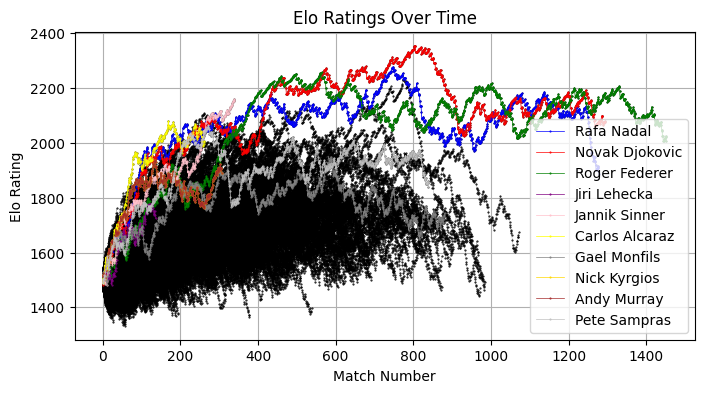

In [19]:
from IPython.display import display
%matplotlib inline
plt.close('all')

nadal = list(all_elo[104745])
novak = list(all_elo[104925])
federer = list(all_elo[103819])
jiri = list(all_elo[208103])
jannik = list(all_elo[206173])
carlos = list(all_elo[207989])
gael = list(all_elo[104792])
nick = list(all_elo[106401])
andy = list(all_elo[104918])
pete = list(all_elo[101736])

# Create a simple line plot
fig = plt.figure(figsize=(8, 4))

for player in all_elo.keys():
    plt.plot(list(all_elo[player]), marker='.', linewidth=0.1, markersize=1, linestyle='-', color='black')

plt.plot(nadal, marker='.', linewidth=0.5, markersize=1, linestyle='-', color='blue', label="Rafa Nadal")
plt.plot(novak, marker='.', linewidth=0.5, markersize=1, linestyle='-', color='red', label="Novak Djokovic")
plt.plot(federer, marker='.', linewidth=0.5, markersize=1, linestyle='-', color='green', label="Roger Federer")
plt.plot(jiri, marker='.', linewidth=0.5, markersize=1, linestyle='-', color='purple', label="Jiri Lehecka")
plt.plot(jannik, marker='.', linewidth=0.5, markersize=1, linestyle='-', color='pink', label="Jannik Sinner")
plt.plot(carlos, marker='.', linewidth=0.5, markersize=1, linestyle='-', color='yellow', label="Carlos Alcaraz")
plt.plot(gael, marker='.', linewidth=0.5, markersize=1, linestyle='-', color='gray', label="Gael Monfils")
plt.plot(nick, marker='.', linewidth=0.5, markersize=1, linestyle='-', color='gold', label="Nick Kyrgios")
plt.plot(nick, marker='.', linewidth=0.5, markersize=1, linestyle='-', color='brown', label="Andy Murray")
plt.plot(pete, marker='.', linewidth=0.5, markersize=1, linestyle='-', color='silver', label="Pete Sampras")

plt.title("Elo Ratings Over Time")
plt.xlabel("Match Number")
plt.ylabel("Elo Rating")

plt.legend(loc="lower right")

plt.grid(True)
plt.savefig("./images/elo_ratings_plot.png", dpi=500)

plt.draw()
plt.show()


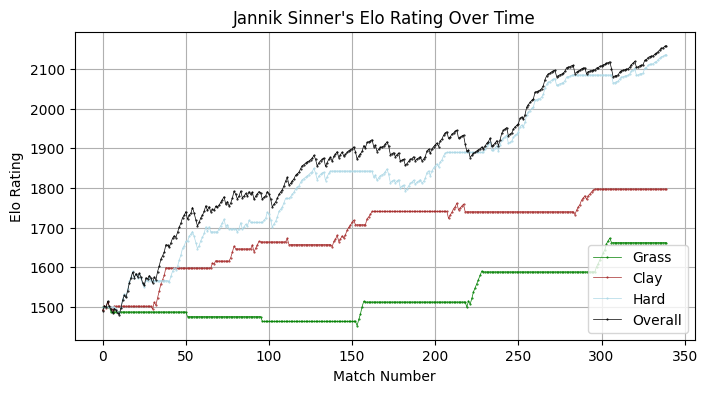

In [20]:
plt.close('all')

player_id = 206173
player_name = "Jannik Sinner"

player = list(all_elo[player_id])
player_grass = list(all_elo_surfaces["Grass"][player_id])
player_clay = list(all_elo_surfaces["Clay"][player_id])
player_hard = list(all_elo_surfaces["Hard"][player_id])

# Create a simple line plot
fig = plt.figure(figsize=(8, 4))

plt.plot(player_grass, marker='.', linewidth=0.5, markersize=1, linestyle='-', color='green', label="Grass")
plt.plot(player_clay, marker='.', linewidth=0.5, markersize=1, linestyle='-', color='brown', label="Clay")
plt.plot(player_hard, marker='.', linewidth=0.5, markersize=1, linestyle='-', color='#ADD8E6', label="Hard")
plt.plot(player, marker='.', linewidth=0.5, markersize=1, linestyle='-', color='black', label="Overall")


plt.title(player_name+"'s Elo Rating Over Time")
plt.xlabel("Match Number")
plt.ylabel("Elo Rating")

plt.legend(loc="lower right")

plt.grid(True)
plt.savefig("./images/"+"".join(player_name.split())+"_elo_rating.png", dpi=500)

plt.draw()
plt.show()

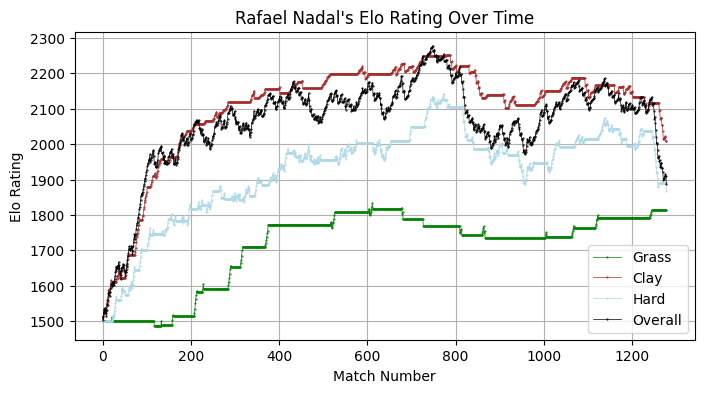

In [21]:
plt.close('all')

player_id = 104745
player_name = "Rafael Nadal"

player = list(all_elo[player_id])
player_grass = list(all_elo_surfaces["Grass"][player_id])
player_clay = list(all_elo_surfaces["Clay"][player_id])
player_hard = list(all_elo_surfaces["Hard"][player_id])

# Create a simple line plot
fig = plt.figure(figsize=(8, 4))

plt.plot(player_grass, marker='.', linewidth=0.5, markersize=1, linestyle='-', color='green', label="Grass")
plt.plot(player_clay, marker='.', linewidth=0.5, markersize=1, linestyle='-', color='brown', label="Clay")
plt.plot(player_hard, marker='.', linewidth=0.5, markersize=1, linestyle='-', color='#ADD8E6', label="Hard")
plt.plot(player, marker='.', linewidth=0.5, markersize=1, linestyle='-', color='black', label="Overall")


plt.title(player_name+"'s Elo Rating Over Time")
plt.xlabel("Match Number")
plt.ylabel("Elo Rating")

plt.legend(loc="lower right")

plt.grid(True)
plt.savefig("./images/"+"".join(player_name.split())+"_elo_rating.png", dpi=500)

plt.draw()
plt.show()

### Final tweaks on the dataset

In [22]:
final_data["RESULT"] = 1
final_data.iloc[80000:90000]

,WINNER_ID,LOSER_ID,ATP_POINT_DIFF,ATP_RANK_DIFF,AGE_DIFF,HEIGHT_DIFF,BEST_OF,DRAW_SIZE,H2H_DIFF,H2H_SURFACE_DIFF,...,P_BP_SAVED_LAST_100_DIFF,P_ACE_LAST_2000_DIFF,P_DF_LAST_2000_DIFF,P_1ST_IN_LAST_2000_DIFF,P_1ST_WON_LAST_2000_DIFF,P_2ND_WON_LAST_2000_DIFF,P_BP_SAVED_LAST_2000_DIFF,ELO_DIFF,ELO_SURFACE_DIFF,RESULT
80000,106432,105051,841.0,-32.0,-9.0,0.0,3,64,0,0,...,7.032683,-0.330893,-3.224492,1.181735,1.066272,6.954831,6.444261,196.379676,196.931634,1
80001,103819,105453,4170.0,-10.0,8.4,7.0,3,64,3,3,...,2.601246,5.820750,-1.090205,1.301195,6.955437,5.241203,6.999375,230.922669,266.413618,1
80002,104925,100644,1690.0,-2.0,9.9,-10.0,3,64,-1,0,...,4.386463,-1.885791,-1.617312,2.405467,1.000547,3.820978,3.747799,214.221116,317.155199,1
80003,106432,103819,-5085.0,17.0,-15.3,3.0,3,64,-1,-2,...,-2.348282,-3.003948,0.569767,-0.431762,-6.309116,-4.984378,-6.931676,-270.614246,-344.586151,1
80004,104925,106432,4630.0,-16.0,9.5,0.0,3,64,2,0,...,1.403582,-0.072891,-0.074031,3.259588,2.416784,3.121504,4.062351,293.841865,378.835340,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89995,105173,200670,-205.0,20.0,10.5,-3.0,3,32,-1,-1,...,-4.286663,-3.588697,-0.912050,0.893106,-2.399061,1.886958,-3.175922,-2.664414,4.030663,1
89996,111581,133430,-961.0,60.0,1.2,3.0,3,32,0,0,...,-9.735391,-4.201453,-1.517761,6.555993,-9.924191,-5.653745,-8.437843,-228.252755,-223.960104,1
89997,111456,106415,-437.0,22.0,0.5,8.0,3,32,-3,-1,...,2.233274,4.169378,0.782954,-1.299286,5.211104,-3.088424,4.551408,-35.547257,-31.073773,1
89998,106218,123896,772.0,-729.0,-4.1,-5.0,3,32,0,0,...,56.722479,5.794820,1.732851,60.454183,69.737500,49.776150,57.940694,147.006529,129.772377,1


### Randomize Dataset

In [23]:
column_to_randomize = []

for val in list(final_data.columns):
    if "DIFF" in val:
        column_to_randomize.append(val)

column_to_randomize.append("RESULT")

final_data[column_to_randomize] = final_data[column_to_randomize].apply(lambda row: row * (-1) if np.random.rand() < 0.5 else row, axis=1)

## Final Dataset

In [24]:
final_data.iloc[80000:90000]

,WINNER_ID,LOSER_ID,ATP_POINT_DIFF,ATP_RANK_DIFF,AGE_DIFF,HEIGHT_DIFF,BEST_OF,DRAW_SIZE,H2H_DIFF,H2H_SURFACE_DIFF,...,P_BP_SAVED_LAST_100_DIFF,P_ACE_LAST_2000_DIFF,P_DF_LAST_2000_DIFF,P_1ST_IN_LAST_2000_DIFF,P_1ST_WON_LAST_2000_DIFF,P_2ND_WON_LAST_2000_DIFF,P_BP_SAVED_LAST_2000_DIFF,ELO_DIFF,ELO_SURFACE_DIFF,RESULT
80000,106432,105051,841.0,-32.0,-9.0,0.0,3,64,0.0,0.0,...,7.032683,-0.330893,-3.224492,1.181735,1.066272,6.954831,6.444261,196.379676,196.931634,1.0
80001,103819,105453,-4170.0,10.0,-8.4,-7.0,3,64,-3.0,-3.0,...,-2.601246,-5.820750,1.090205,-1.301195,-6.955437,-5.241203,-6.999375,-230.922669,-266.413618,-1.0
80002,104925,100644,1690.0,-2.0,9.9,-10.0,3,64,-1.0,0.0,...,4.386463,-1.885791,-1.617312,2.405467,1.000547,3.820978,3.747799,214.221116,317.155199,1.0
80003,106432,103819,-5085.0,17.0,-15.3,3.0,3,64,-1.0,-2.0,...,-2.348282,-3.003948,0.569767,-0.431762,-6.309116,-4.984378,-6.931676,-270.614246,-344.586151,1.0
80004,104925,106432,4630.0,-16.0,9.5,0.0,3,64,2.0,0.0,...,1.403582,-0.072891,-0.074031,3.259588,2.416784,3.121504,4.062351,293.841865,378.835340,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89995,105173,200670,205.0,-20.0,-10.5,3.0,3,32,1.0,1.0,...,4.286663,3.588697,0.912050,-0.893106,2.399061,-1.886958,3.175922,2.664414,-4.030663,-1.0
89996,111581,133430,-961.0,60.0,1.2,3.0,3,32,0.0,0.0,...,-9.735391,-4.201453,-1.517761,6.555993,-9.924191,-5.653745,-8.437843,-228.252755,-223.960104,1.0
89997,111456,106415,-437.0,22.0,0.5,8.0,3,32,-3.0,-1.0,...,2.233274,4.169378,0.782954,-1.299286,5.211104,-3.088424,4.551408,-35.547257,-31.073773,1.0
89998,106218,123896,772.0,-729.0,-4.1,-5.0,3,32,0.0,0.0,...,56.722479,5.794820,1.732851,60.454183,69.737500,49.776150,57.940694,147.006529,129.772377,1.0


In [25]:
# Getting results starting from 1995
final_data = final_data[15000:]

In [26]:
# Let's drop some features
# for feature in final_data.keys()[2:]:
#     if feature not in ['ATP_POINT_DIFF','ATP_RANK_DIFF','BEST_OF','DRAW_SIZE','WIN_LAST_10_DIFF','WIN_LAST_25_DIFF','WIN_LAST_50_DIFF','P_1ST_WON_LAST_10_DIFF','P_2ND_WON_LAST_10_DIFF','P_1ST_WON_LAST_20_DIFF','P_2ND_WON_LAST_20_DIFF','P_1ST_WON_LAST_50_DIFF','P_2ND_WON_LAST_50_DIFF','P_BP_SAVED_LAST_50_DIFF','P_1ST_WON_LAST_100_DIFF','P_2ND_WON_LAST_100_DIFF','P_BP_SAVED_LAST_100_DIFF','ELO_DIFF','ELO_SURFACE_DIFF','RESULT']:
#         final_data = final_data.drop(feature, axis=1)


In [27]:
# for feature in final_data.keys()[2:]:
#     if feature not in ['ATP_POINT_DIFF','ATP_RANK_DIFF','WIN_LAST_10_DIFF','WIN_LAST_25_DIFF','P_1ST_WON_LAST_100_DIFF','P_2ND_WON_LAST_100_DIFF','P_BP_SAVED_LAST_100_DIFF','ELO_DIFF','ELO_SURFACE_DIFF','RESULT']:
#         final_data = final_data.drop(feature, axis=1)


In [28]:

# for feature in final_data.keys()[2:]:
#     if feature not in ['WIN_LAST_10_DIFF','WIN_LAST_25_DIFF','P_1ST_WON_LAST_100_DIFF','P_2ND_WON_LAST_100_DIFF','P_BP_SAVED_LAST_100_DIFF','ELO_DIFF','ELO_SURFACE_DIFF','RESULT']:
#         final_data = final_data.drop(feature, axis=1)


In [29]:
data_np = final_data.to_numpy(dtype=object)[:, 2:]
np.random.shuffle(data_np)
data_np

array([[1455.0, -3.0, -2.3000000000000007, ..., -10.452314939718917,
        34.72668978643901, -1.0],
       [363.0, -17.0, 8.099999999999998, ..., 59.455257996582986,
        27.885882950203722, -1.0],
       [430.0, -322.0, 1.4000000000000021, ..., 222.91644807997523,
        210.71062526685273, 1.0],
       ...,
       [199.0, -59.0, -8.600000000000001, ..., -113.95816381312216,
        -172.98594661579568, 1.0],
       [-1774.0, 106.0, -0.0, ..., -300.77892123321044,
        -314.7336721071463, -1.0],
       [-682.0, 73.0, 8.5, ..., -113.10238754249167, -111.32658152190288,
        1.0]], dtype=object)

In [30]:
split = 0.90
total_rows = final_data.shape[0]
value = round(split*total_rows)

data_np_train = data_np[:value,:]
data_np_test = data_np[value:,:]

In [31]:
mapper = np.vectorize(lambda x: "Player 2 Wins" if x == -1 else "Player 1 Wins")
reverse_mapper = np.vectorize(lambda x: 0 if x == "Player 2 Wins" else 1)
x_train = data_np_train[:,:-1]
x_test = data_np_test[:,:-1]
y_pred_train = mapper(data_np_train[:,-1:])
y_pred_test = mapper(data_np_test[:,-1:])

In [32]:
data_np_train.shape

(72338, 44)

In [33]:
from sklearn.metrics import accuracy_score
# Gonna try dropping some columns to see if accuracy increases
# Note that for some of the features are switched (like ATP_RANK_DIFF, where more positive is better)
total_features = final_data.keys()[2:]

for i in range(data_np_test.shape[1]):
    elo_pred = []

    for row in data_np_test[:,i:i+1]:
        if row[0] > 0:
            elo_pred.append("Player 1 Wins")
        else:
            elo_pred.append("Player 2 Wins")

    print(total_features[i]+": "+str(accuracy_score(y_pred_test, elo_pred)))
    


ATP_POINT_DIFF: 0.6494960806270996
ATP_RANK_DIFF: 0.35037949483638176
AGE_DIFF: 0.4813985317904691
HEIGHT_DIFF: 0.5315416200074655
BEST_OF: 0.49346771183277344
DRAW_SIZE: 0.49346771183277344
H2H_DIFF: 0.548214507900958
H2H_SURFACE_DIFF: 0.5383849695159886
WIN_LAST_10_DIFF: 0.6215005599104143
WIN_LAST_25_DIFF: 0.6445190991663556
WIN_LAST_50_DIFF: 0.6446435237028743
P_ACE_LAST_10_DIFF: 0.5600348388702252
P_DF_LAST_10_DIFF: 0.4743063332089088
P_1ST_IN_LAST_10_DIFF: 0.5264402140102028
P_1ST_WON_LAST_10_DIFF: 0.5915142466094314
P_2ND_WON_LAST_10_DIFF: 0.5834266517357223
P_BP_SAVED_LAST_10_DIFF: 0.5480900833644394
P_ACE_LAST_20_DIFF: 0.55605325370163
P_DF_LAST_20_DIFF: 0.4728132387706856
P_1ST_IN_LAST_20_DIFF: 0.525444817718054
P_1ST_WON_LAST_20_DIFF: 0.5942515864128406
P_2ND_WON_LAST_20_DIFF: 0.600348388702252
P_BP_SAVED_LAST_20_DIFF: 0.5636431504292646
P_ACE_LAST_50_DIFF: 0.557919621749409
P_DF_LAST_50_DIFF: 0.47293766330720416
P_1ST_IN_LAST_50_DIFF: 0.5249471195719796
P_1ST_WON_LAST_50_DI

In [34]:
final_data.keys()

Index(['WINNER_ID', 'LOSER_ID', 'ATP_POINT_DIFF', 'ATP_RANK_DIFF', 'AGE_DIFF',
       'HEIGHT_DIFF', 'BEST_OF', 'DRAW_SIZE', 'H2H_DIFF', 'H2H_SURFACE_DIFF',
       'WIN_LAST_10_DIFF', 'WIN_LAST_25_DIFF', 'WIN_LAST_50_DIFF',
       'P_ACE_LAST_10_DIFF', 'P_DF_LAST_10_DIFF', 'P_1ST_IN_LAST_10_DIFF',
       'P_1ST_WON_LAST_10_DIFF', 'P_2ND_WON_LAST_10_DIFF',
       'P_BP_SAVED_LAST_10_DIFF', 'P_ACE_LAST_20_DIFF', 'P_DF_LAST_20_DIFF',
       'P_1ST_IN_LAST_20_DIFF', 'P_1ST_WON_LAST_20_DIFF',
       'P_2ND_WON_LAST_20_DIFF', 'P_BP_SAVED_LAST_20_DIFF',
       'P_ACE_LAST_50_DIFF', 'P_DF_LAST_50_DIFF', 'P_1ST_IN_LAST_50_DIFF',
       'P_1ST_WON_LAST_50_DIFF', 'P_2ND_WON_LAST_50_DIFF',
       'P_BP_SAVED_LAST_50_DIFF', 'P_ACE_LAST_100_DIFF', 'P_DF_LAST_100_DIFF',
       'P_1ST_IN_LAST_100_DIFF', 'P_1ST_WON_LAST_100_DIFF',
       'P_2ND_WON_LAST_100_DIFF', 'P_BP_SAVED_LAST_100_DIFF',
       'P_ACE_LAST_2000_DIFF', 'P_DF_LAST_2000_DIFF',
       'P_1ST_IN_LAST_2000_DIFF', 'P_1ST_WON_LAST_2000_DIF

In [35]:
# Let's see the accuracy of the ATP points
elo_pred = []

for row in data_np_test[:,:1]:
    if row[0] > 0:
        elo_pred.append("Player 1 Wins")
    else:
        elo_pred.append("Player 2 Wins")

accuracy_score(y_pred_test, elo_pred)

0.6494960806270996

## Plot Datset PCA

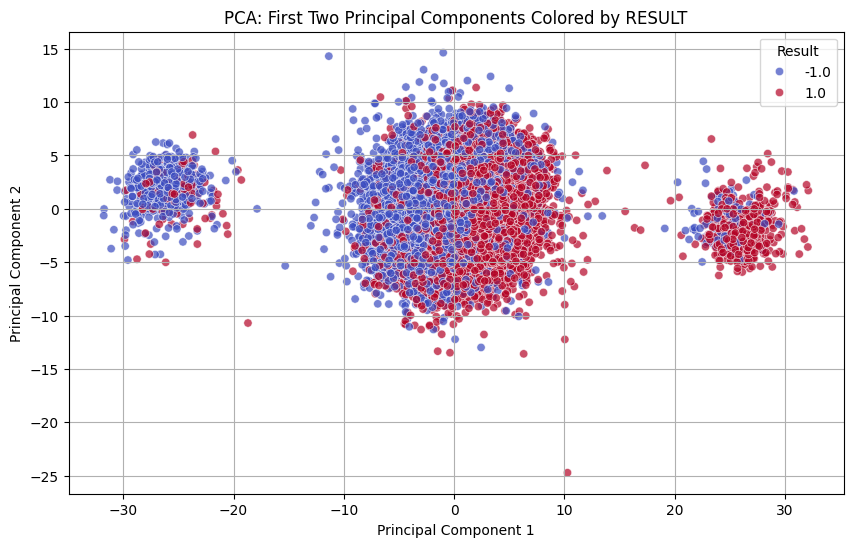

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Load your dataset (Make sure 'final_data' is already defined)
# final_data = pd.read_csv("your_dataset.csv")  # Uncomment this if loading from a file

# Drop the target variable ('RESULT') if it exists
features = final_data.drop(columns=['RESULT'], errors='ignore')

# Standardizing the data
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Applying PCA with 14 principal components
pca_14 = PCA(n_components=14)
principal_components_14 = pca_14.fit_transform(features_scaled)

# Creating a DataFrame with the first 14 principal components
pca_df_14 = pd.DataFrame(principal_components_14, columns=[f'PC{i+1}' for i in range(14)])

# Add the RESULT column back to the PCA DataFrame (if it was originally present in the dataset)
if 'RESULT' in final_data.columns:
    pca_df_14['RESULT'] = final_data['RESULT'].values

# Plot the first two principal components with hue set to RESULT
plt.figure(figsize=(10, 6))
sns.scatterplot(x=pca_df_14['PC1'], y=pca_df_14['PC2'], hue=pca_df_14['RESULT'], palette='coolwarm', alpha=0.7)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA: First Two Principal Components Colored by RESULT')
plt.legend(title="Result")
plt.grid(True)
plt.show()


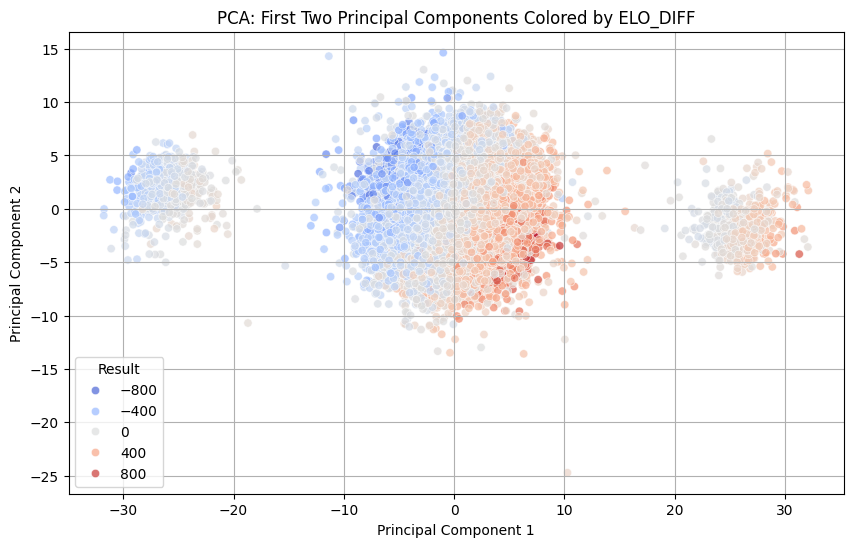

In [58]:
# Plot the first two principal components with hue set to ELO_DIFF
if 'ELO_DIFF' in final_data.columns:
    pca_df_14['ELO_DIFF'] = final_data['ELO_DIFF'].values

plt.figure(figsize=(10, 6))
sns.scatterplot(x=pca_df_14['PC1'], y=pca_df_14['PC2'], hue=pca_df_14['ELO_DIFF'], palette='coolwarm', alpha=0.7)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA: First Two Principal Components Colored by ELO_DIFF')
plt.legend(title="Result")
plt.grid(True)
plt.show()

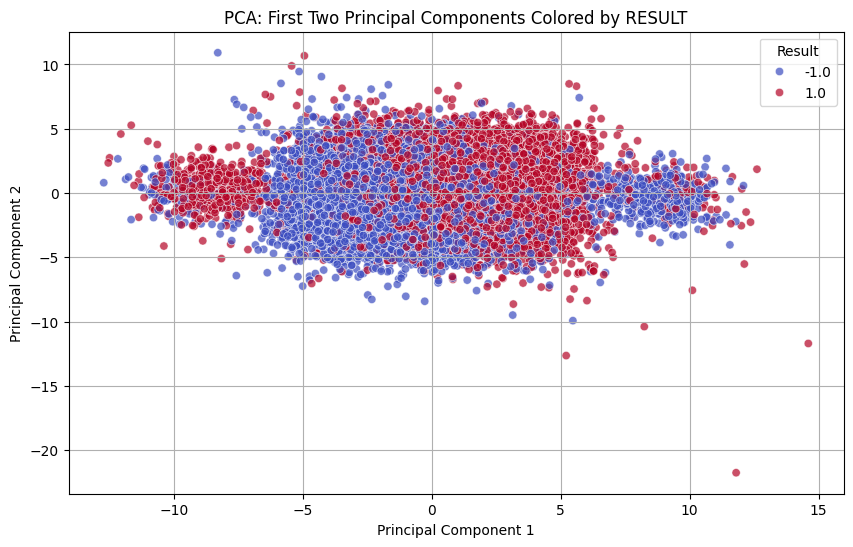

In [56]:
# Plot the first two principal components with hue set to RESULT
plt.figure(figsize=(10, 6))
sns.scatterplot(x=pca_df_14['PC3'], y=pca_df_14['PC4'], hue=pca_df_14['RESULT'], palette='coolwarm', alpha=0.7)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA: First Two Principal Components Colored by RESULT')
plt.legend(title="Result")
plt.grid(True)
plt.show()


In [45]:
# Get PCA loadings (how much each original feature contributes to each principal component)
loadings = pd.DataFrame(pca_14.components_.T, 
                        columns=[f'PC{i+1}' for i in range(14)], 
                        index=features.columns)

# Display absolute contributions of features to PC1 & PC2
print("Feature importance in PC1 and PC2:")
print(loadings[['PC1', 'PC2']].abs().sort_values(by='PC1', ascending=False))


Feature importance in PC1 and PC2:
                                PC1       PC2
P_1ST_WON_LAST_50_DIFF     0.227005  0.081788
P_1ST_WON_LAST_100_DIFF    0.226879  0.082060
P_1ST_WON_LAST_20_DIFF     0.224693  0.081168
P_1ST_WON_LAST_2000_DIFF   0.224360  0.086747
P_1ST_WON_LAST_10_DIFF     0.218867  0.078541
P_2ND_WON_LAST_100_DIFF    0.217075  0.106257
P_2ND_WON_LAST_2000_DIFF   0.216126  0.096099
P_2ND_WON_LAST_50_DIFF     0.215579  0.109617
P_BP_SAVED_LAST_2000_DIFF  0.214100  0.009218
P_BP_SAVED_LAST_100_DIFF   0.213336  0.004860
P_BP_SAVED_LAST_50_DIFF    0.208460  0.002176
P_2ND_WON_LAST_20_DIFF     0.207772  0.111241
P_2ND_WON_LAST_10_DIFF     0.193603  0.107753
P_BP_SAVED_LAST_20_DIFF    0.190596  0.000750
P_1ST_IN_LAST_100_DIFF     0.169075  0.150657
P_1ST_IN_LAST_50_DIFF      0.168134  0.152483
P_1ST_IN_LAST_2000_DIFF    0.167437  0.147580
P_BP_SAVED_LAST_10_DIFF    0.165496  0.003079
P_1ST_IN_LAST_20_DIFF      0.165028  0.153573
P_1ST_IN_LAST_10_DIFF      0.160110  0.151338

In [52]:
!pip install umap-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.8/88.8 kB 777.8 kB/s eta 0:00:000:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 2.8 MB/s eta 0:00:00


# Train Dataset

In [42]:
from DecisionTree import DecisionTree
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.tree import plot_tree

### Random Forest with Sklearn

In [43]:
# Instantiate a RandomForest
forest_sklearn = RandomForestClassifier(n_estimators=200, max_depth=30, min_samples_split=10, max_features="log2", bootstrap=True)
forest_sklearn = forest_sklearn.fit(x_train, y_pred_train)

# Make predictions and test accuracy
predictions_train = forest_sklearn.predict(x_train)
predictions_test = forest_sklearn.predict(x_test)
print("Train Accuracy: "+str(accuracy_score(y_pred_train, predictions_train)))
print("Test Accuracy: "+str(accuracy_score(y_pred_test, predictions_test)))

/opt/homebrew/anaconda3/envs/neuralNets/lib/python3.12/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Train Accuracy: 0.986258951035417
Test Accuracy: 0.7744183152917755


In [44]:
forest_sklearn.feature_importances_

array([0.04653232, 0.0323035 , 0.02368483, 0.01122588, 0.00172532,
       0.00640224, 0.00718349, 0.00524808, 0.01828088, 0.02604682,
       0.046658  , 0.01487376, 0.01581422, 0.01506503, 0.01708632,
       0.01922393, 0.01632395, 0.01424363, 0.0147158 , 0.01463948,
       0.01632957, 0.01897495, 0.01624131, 0.01367002, 0.01419601,
       0.01439724, 0.01652027, 0.02137261, 0.01612658, 0.01373235,
       0.01424246, 0.01429156, 0.01767166, 0.02470412, 0.01660025,
       0.01374414, 0.01486355, 0.01483738, 0.01537756, 0.02122714,
       0.01725424, 0.14766043, 0.13868713])

Okay, this is actually really overfitted (did not realize it was this much haha). Let's try some other parameters to see what happens

In [45]:
# Instantiate a RandomForest
forest_sklearn = RandomForestClassifier(n_estimators=200, max_depth=10, min_samples_split=10, min_samples_leaf=5, max_features="log2", bootstrap=True)
forest_sklearn = forest_sklearn.fit(data_np_train[:,:-1], y_pred_train)

# Make predictions and test accuracy
predictions_test = forest_sklearn.predict(data_np_test[:,:-1])
predictions_train = forest_sklearn.predict(data_np_train[:,:-1])
print("Train Accuracy: "+str(accuracy_score(y_pred_train, predictions_train)))
print("Test Accuracy: "+str(accuracy_score(y_pred_test, predictions_test)))

/opt/homebrew/anaconda3/envs/neuralNets/lib/python3.12/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


KeyboardInterrupt: 

In [ ]:
# Instantiate a RandomForest
decision_sklearn = DecisionTreeClassifier(max_depth=10, min_samples_split=10, min_samples_leaf=5,)
decision_sklearn = decision_sklearn.fit(data_np_train[:,:-1], y_pred_train)

# Make predictions and test accuracy
predictions_test = decision_sklearn.predict(data_np_test[:,:-1])
predictions_train = decision_sklearn.predict(data_np_train[:,:-1])
print("Train Accuracy: "+str(accuracy_score(y_pred_train, predictions_train)))
print("Test Accuracy: "+str(accuracy_score(y_pred_test, predictions_test)))

Train Accuracy: 0.8005197821338715
Test Accuracy: 0.7510265024262784


In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

# Instantiate an XGBoost Classifier
xgb_model = XGBClassifier(n_estimators=200, max_depth=10, learning_rate=0.1, subsample=0.8, colsample_bytree=0.7)

# Train the model
xgb_model.fit(data_np_train[:, :-1], reverse_mapper(y_pred_train))

# Make predictions
predictions_test = xgb_model.predict(data_np_test[:, :-1])
predictions_train = xgb_model.predict(data_np_train[:, :-1])

# Calculate accuracy
print("Train Accuracy: " + str(accuracy_score(reverse_mapper(y_pred_train), predictions_train)))
print("Test Accuracy: " + str(accuracy_score(reverse_mapper(y_pred_test), predictions_test)))


Train Accuracy: 0.9874892864054854
Test Accuracy: 0.8034092323006097


In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

# Define parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [6, 10, 15],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.7, 0.8]
}

# Instantiate an XGBoost Classifier
xgb_model = XGBClassifier()

# Perform GridSearchCV
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, scoring='accuracy', cv=5, verbose=3, n_jobs=-1)
grid_search.fit(data_np_train[:, :-1], reverse_mapper(y_pred_train))

# Best parameters
print("Best Parameters:", grid_search.best_params_)

# Train the best model
best_xgb_model = grid_search.best_estimator_

# Make predictions
predictions_test = best_xgb_model.predict(data_np_test[:, :-1])
predictions_train = best_xgb_model.predict(data_np_train[:, :-1])

# Calculate accuracy
print("Train Accuracy:", accuracy_score(reverse_mapper(y_pred_train), predictions_train))
print("Test Accuracy:", accuracy_score(reverse_mapper(y_pred_test), predictions_test))


Fitting 5 folds for each of 243 candidates, totalling 1215 fits
[CV 2/5] END colsample_bytree=0.6, learning_rate=0.01, max_depth=6, n_estimators=100, subsample=0.6;, score=0.763 total time=   2.0s
[CV 1/5] END colsample_bytree=0.6, learning_rate=0.01, max_depth=6, n_estimators=100, subsample=0.6;, score=0.769 total time=   2.1s
[CV 3/5] END colsample_bytree=0.6, learning_rate=0.01, max_depth=6, n_estimators=100, subsample=0.6;, score=0.768 total time=   2.0s
[CV 4/5] END colsample_bytree=0.6, learning_rate=0.01, max_depth=6, n_estimators=100, subsample=0.6;, score=0.766 total time=   2.2s
[CV 5/5] END colsample_bytree=0.6, learning_rate=0.01, max_depth=6, n_estimators=100, subsample=0.6;, score=0.766 total time=   2.0s
[CV 1/5] END colsample_bytree=0.6, learning_rate=0.01, max_depth=6, n_estimators=100, subsample=0.8;, score=0.771 total time=   2.0s
[CV 2/5] END colsample_bytree=0.6, learning_rate=0.01, max_depth=6, n_estimators=100, subsample=0.8;, score=0.764 total time=   2.1s
[CV 3

/opt/homebrew/anaconda3/envs/neuralNets/lib/python3.12/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


[CV 3/5] END colsample_bytree=0.6, learning_rate=0.01, max_depth=10, n_estimators=300, subsample=0.8;, score=0.791 total time=  27.5s
[CV 4/5] END colsample_bytree=0.6, learning_rate=0.01, max_depth=10, n_estimators=300, subsample=0.8;, score=0.791 total time=  27.7s
[CV 5/5] END colsample_bytree=0.6, learning_rate=0.01, max_depth=10, n_estimators=300, subsample=0.8;, score=0.791 total time=  28.4s
[CV 1/5] END colsample_bytree=0.6, learning_rate=0.01, max_depth=10, n_estimators=300, subsample=1.0;, score=0.796 total time=  29.6s
[CV 2/5] END colsample_bytree=0.6, learning_rate=0.01, max_depth=10, n_estimators=300, subsample=1.0;, score=0.790 total time=  29.7s
[CV 3/5] END colsample_bytree=0.6, learning_rate=0.01, max_depth=10, n_estimators=300, subsample=1.0;, score=0.791 total time=  29.1s
[CV 4/5] END colsample_bytree=0.6, learning_rate=0.01, max_depth=10, n_estimators=300, subsample=1.0;, score=0.789 total time=  30.7s
[CV 5/5] END colsample_bytree=0.6, learning_rate=0.01, max_dep

In [ ]:
data_np_train

In [ ]:
xgb_model.feature_importances_

In [ ]:
reverse_mapper(y_pred_train)

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.preprocessing import StandardScaler

# Normalize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(data_np_train[:, :-1])
X_test = scaler.transform(data_np_test[:, :-1])

# Define the neural network
model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),  # First hidden layer
    layers.Dense(32, activation='relu'),  # Second hidden layer
    layers.Dense(16, activation='relu'),  # Third hidden layer
    layers.Dense(1, activation='sigmoid')  # Output layer (for binary classification)
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, reverse_mapper(y_pred_train), epochs=50, batch_size=32, validation_split=0.2, verbose=1)

# Evaluate on test set
train_loss, train_acc = model.evaluate(X_train, reverse_mapper(y_pred_train), verbose=0)
test_loss, test_acc = model.evaluate(X_test, reverse_mapper(y_pred_test), verbose=0)

print(f"Train Accuracy: {train_acc}")
print(f"Test Accuracy: {test_acc}")


In [ ]:
!pip3 install tensorflow

In [ ]:
data_np_train[:,:-1]

Trying GridSearchCV to see what happens

In [ ]:
# from sklearn.model_selection import GridSearchCV

# param_grid = {
#     'n_estimators': [100, 200, 300],
#     'max_depth': [10, 15, 20, None],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 5],
#     'max_features': ['sqrt', 'log2']
# }

# grid_search = GridSearchCV(
#     estimator=RandomForestClassifier(),
#     param_grid=param_grid,
#     cv=5,  # 5-fold cross-validation
#     n_jobs=-1,
#     verbose=4
# )
# grid_search.fit(data_np_train[:,:-1], y_pred_train.squeeze())

# print("Best params:", grid_search.best_params_)
# print("Best cross-validation score:", grid_search.best_score_)


### Test with ELO rating and ATP points prediction

In [ ]:
total_features = final_data.keys()[2:]
total_features

In [ ]:
total_features = final_data.keys()[2:]

for i in range(data_np_test.shape[1]):
    elo_pred = []

    for row in data_np_test[:,i:i+1]:
        if row[0] > 0:
            elo_pred.append("Player 1 Wins")
        else:
            elo_pred.append("Player 2 Wins")

    print(total_features[i]+": "+str(accuracy_score(y_pred_test, elo_pred)))
    

In [ ]:
elo_pred = []

for row in data_np_test[:,-3:-2]:
    if row[0] > 0:
        elo_pred.append("Player 1 Wins")
    else:
        elo_pred.append("Player 2 Wins")

accuracy_score(y_pred_test, elo_pred)

In [ ]:
data_np_test.shape[1]

In [ ]:
# Let's see the accuracy of the ELO rating, and how many times there is an upset
elo_pred = []

for row in data_np_test[:,-3:-2]:
    if row[0] > 0:
        elo_pred.append("Player 1 Wins")
    else:
        elo_pred.append("Player 2 Wins")

accuracy_score(y_pred_test, elo_pred)
    

In [ ]:
# Let's see the accuracy of the surface ELO rating
elo_pred = []

for row in data_np_test[:,-2:-1]:
    if row[0] > 0:
        elo_pred.append("Player 1 Wins")
    else:
        elo_pred.append("Player 2 Wins")

accuracy_score(y_pred_test, elo_pred)

In [ ]:
# Let's see the accuracy of the ATP points
elo_pred = []

for row in data_np_test[:,:1]:
    if row[0] > 0:
        elo_pred.append("Player 1 Wins")
    else:
        elo_pred.append("Player 2 Wins")

accuracy_score(y_pred_test, elo_pred)

In [ ]:
# Let's see the accuracy of the ATP rank
elo_pred = []

for row in data_np_test[:,1:2]:
    if row[0] < 0:
        elo_pred.append("Player 1 Wins")
    else:
        elo_pred.append("Player 2 Wins")

accuracy_score(y_pred_test, elo_pred)